# ✒️회고

## 🧩 핵심 ISSUE

### 1. 환경 설정

로컬 환경에서 Test Run 을 해보려 했으나
`pyvirtualdisplay` 에서 문제가 발생했다.

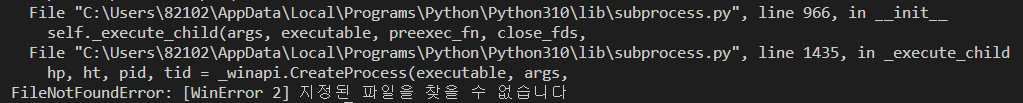

그래서 colab 을 이용하려 했으나 동일한 라이브러리에서 다른 에러가 발생했다.

[윈도우패키지관리자설치](https://evandde.github.io/chocolatey/)

여기서 ffmpeg 는 설치 가능


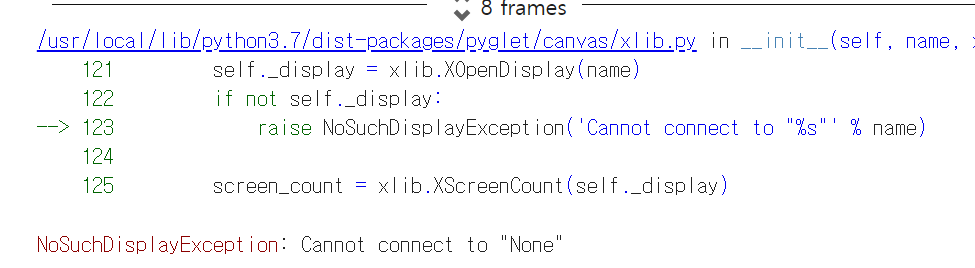


이 때, 리눅스 운영체제에서 
xvfb 를 설치하고

xvfb-run -s "-screen 0 1400x900x24" jupyter notebook 

다음과 같은 명령어로 쥬피터를 키라는 글을 봤다

허나 colab 에서 가상모니터를 켤 수는 있지만 gif로 어떤 파일을 저장할 수는 없다고 판단했다.

결과적으로는 GCP( Google Cloud Platform ) 을 이용했으며,  
클라우드 내부 리눅스에서 쥬피터를 연결할 수가 있었다.

우리가 구축한 가상환경의 순서는 다음과 같다.

1. GCP로 가상환경 구축  
- GCP에 접속해 인스턴스를 생성한다.
- 고정 IP 와 방화벽을 설정한다
- 아나콘다를 설치하고 가상환경을 구축한다.
- 쥬피터 노트북을 설정한다.

자세한 GCP 사용방법은 [링크](https://www.notion.so/GCP-e48565c2fe7c46c3888fbe28ccb3409b) 를 통해 확인할 수 있다.

2. display 모듈 설치  
리눅스 창에서   
다음의 display 관련 패키지를 설치한다.
- `sudo apt install xvfb`  
- `sudo apt install ffmpeg`  
- `sudo apt-get update`   
- `sudo apt-get install freeglut3-dev`  

3. jupyter open
다음의 명령어로 jupyter notebook 을 실행한다.
- `xvfb-run -a jupyter notebook`

### 2. Agent 코드 구축

#### 1번째 방식 : object 에 따른 table 다원화

영철님

#### 2 번째 방식 : DQN 알고리즘


'바닥부터 배우는 강화학습' 의 [실습코드](https://github.com/seungeunrho/RLfrombasics)를 참고했다.  
DQN 기반의 Agent 를 생성했는데, 다양한 고민거리가 있었다.

1. 학습을 위한 input 값으로 state 값을 어떻게 입력해주는지

2. 

## 🍼 기타 ISSUE

### 1. from string import `ascii_ string`

파이썬에서는 기본 알파벳이나 숫자 데이터 정도는 상수로 정의되어 있다.



In [1]:
import string 

string.ascii_lowercase # 소문자 abcdefghijklmnopqrstuvwxyz
string.ascii_uppercase # 대문자 ABCDEFGHIJKLMNOPQRSTUVWXYZ
string.ascii_letters # 대소문자 모두 abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
string.digits # 숫자 0123456789



'0123456789'

### 2. 다양한 배열 처리 오류

- `tensor(list)` 를 사용하면서 생긴 오류 :  
> expected sequence of length 90 at dim 1 (got 10)

리스트 안의 리스트들이 90개의 데이터를 가지고 있는데, 지금 받은 건 10개의 데이터밖에 없다는 의미였다.
`reshape()` 가 아닌 `flatten()` 함수를 이용해 차원을 축소해 해결하였다.

- `gather(1, list)` 를 사용하면서 생긴 오류 :  
> Expected dtype int64 for index  

gather 를  쓸 수 없는 타입이 list 에 들어있다는 뜻이다.

- `tensor(array)` 오류
> c:\Users\82102\Oha\Urien\project\Agent.py:42: UserWarning:   
Creating a tensor from a list of numpy.ndarrays is extremely slow.  
Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor.  
(Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:210.)  

array 안에 arrray 형식이 2 개이상 있어 속도가 느려질 수 있다는 뜻이다. 예를 들어,  

`array = [[array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5],[1,2,3,4,5])]`

이런식으로 리스트 안에 array 가 여러번 반복되면 tensor화에 좋지 않다.

이를 합쳐주기 위해서는  
`numpy.concatenate( array, axis=0 )`  
`numpy.stack( array, axis=0 )`  
등을 사용할 수 있다.
